In [36]:
import os
# import math
from itertools import repeat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
pd.set_option('display.max_columns', None)  # if you need to view less rows, comment
# pd.set_option('display.max_rows', None)  # if you need to view more rows, uncomment
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

In [72]:
file_location = '/home/kmeador/SEC' # escher
# file_location = '/home/kylemeador' # powerpanda
file_name = '211008_10E_SEC_Superdex200'

In [73]:
# for file in file_names:
#     process_sec_image()

In [74]:
extension = 'csv'
analysis_file = os.path.join(file_location, '%s.%s' % (file_name, extension))

In [75]:
sec_data_df = pd.read_csv(analysis_file, header=[0,1])

In [76]:
sec_data_df.head()

10E Run01                                                          \
  UV3 (280 nm)_volume UV3 (280 nm)_mAU Conductivity_volume Conductivity_mS/cm   
0           -0.993075              0.0           -0.993075           6.052461   
1           -0.990585              0.0           -0.990585           6.052461   
2           -0.988681              0.0           -0.988681           6.052692   
3           -0.986777              NaN           -0.986777           6.052461   
4           -0.984384              NaN           -0.984384           6.052461   

                                                                     \
  %B_volume   %B_% delta Col Pressure_volume delta Col Pressure_MPa   
0 -0.993075  100.0                 -0.987753               0.013790   
1 -0.989755  100.0                 -0.978574               0.000000   
2 -0.980966  100.0                 -0.966269               0.068948   
3 -0.968759  100.0                 -0.953769               0.275790   
4 -0.956259  100.0                 -0.941269               0.427475   

                                                                    \
  Temperature_volume Temperature_C Baseline of UV3 (280 nm)_volume   
0          -0.993075     11.217049                       -0.993075   
1          -0.990585     11.217049                       -0.990585   
2          -0.988681     11.217049                       -0.988681   
3          -0.986777     11.217049                       -0.986777   
4          -0.984384     11.217049                       -0.984384   

                                
  Baseline of UV3 (280 nm)_mAU  
0                  -326.484680  
1                  -326.438040  
2                  -326.402336  
3                          NaN  
4                          NaN

In [77]:
uv_columns = []
volume = None
for column in sec_data_df.columns.levels[-1].to_list():
    if column.startswith('UV'):
        if column.endswith('_volume'):  # not volume and 
            volume = column
        else:
            uv_columns.append(column)

In [78]:
print(volume, uv_columns)

UV3 (280 nm)_volume ['UV3 (280 nm)_mAU']


In [88]:
formatted_df = sec_data_df.loc[:, idx_slice[:, [volume] + uv_columns]].droplevel(0, axis=1)

In [89]:
formatted_df = formatted_df[formatted_df[volume] > 0.007]
formatted_df.index = formatted_df[volume]
formatted_df.index.name = 'volume'
formatted_df.drop(volume, axis=1, inplace=True)
formatted_df.columns = formatted_df.columns.map(dict(zip(
    formatted_df.columns, 
    map(str.strip, map(str.strip, map(str.replace, 
                                      map(str.replace, formatted_df.columns, repeat('_mAU'), repeat('')),
                                      repeat('UV'), repeat('')), 
                       repeat('1234567890 ')), 
        repeat('()')))))

In [94]:
#formatted_df

In [91]:
formatted_df['280 nm'].plot()

<AxesSubplot:xlabel='volume'>

In [92]:
formatted_df.plot()

<AxesSubplot:xlabel='volume'>

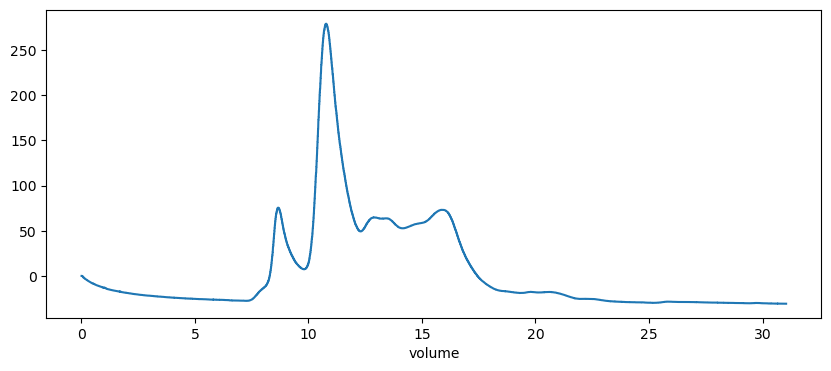

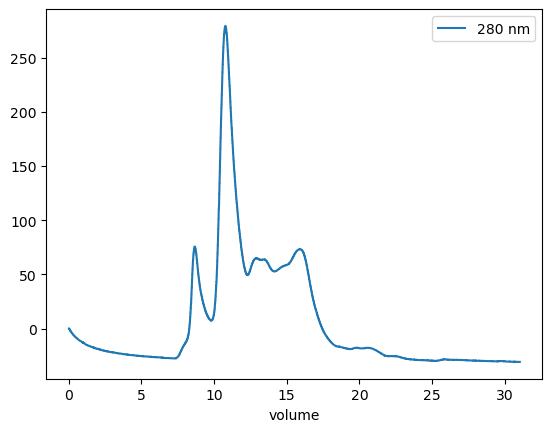

In [93]:
plt.show()

In [85]:
figure_aspect_ratio = (10, 4)
fig = plt.figure(figsize=figure_aspect_ratio)
uv_ax = fig.subplots(1, 1)
uv_ax.plot(formatted_df, ) # label='Contact Order', color='#fbc0cb', lw=1, linestyle='-'

In [86]:
fig.clear()